In [ ]:
from IPython.display import Image

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
mini_iris = np.round(iris.data[:, :2]).astype(int)
data = pd.DataFrame(mini_iris, columns=['length', 'width'])
data['type'] = iris.target

#shuffle data
data = data.iloc[np.random.permutation(len(data))]

In [4]:
data.head()

,length,width,type
80,6,2,1
132,6,3,2
148,6,3,2
27,5,4,0
103,6,3,2


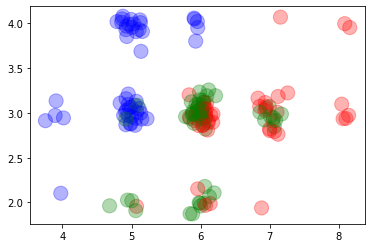

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

# Adding a little bit of noise so it is easier to visualise
data_with_noise = data.iloc[:, :2] + np.random.normal(loc=0, scale=0.1, size=(150, 2))
plt.scatter(data_with_noise.length, data_with_noise.width, c=["bgr"[k] for k in data.iloc[:,2] ], s=200, alpha =0.3)

In [6]:
# train a Decision Tree on this data
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[['length', 'width']].values, data.type.values, test_size=0.2)

classifier = DecisionTreeClassifier(max_depth=4)
classifier.fit(X_train, y_train)
classifier.predict(X_test)

array([0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       2, 0, 1, 1, 0, 2, 0, 0])

In [7]:
classifier.score(X_test, y_test)

0.7666666666666667

Compute a Joint Probability Distribution over all variables and then marginalise and
reduce over these according to new data point to get probabilities of classes.

In [8]:
X_train, X_test = data[:120], data[:120]
X_train

,length,width,type
80,6,2,1
132,6,3,2
148,6,3,2
27,5,4,0
103,6,3,2
...,...,...,...
1,5,3,0
19,5,4,0
51,6,3,1
115,6,3,2


In [9]:
# Compute the joint probability distribution over the training data
joint_prob = X_train.groupby(['length', 'width', 'type']).size()/120
joint_prob

length  width  type
4       2      0       0.008333
        3      0       0.016667
5       2      1       0.016667
               2       0.008333
        3      0       0.141667
               1       0.008333
        4      0       0.133333
6       2      1       0.066667
               2       0.025000
        3      1       0.166667
               2       0.183333
        4      0       0.041667
7       2      2       0.008333
        3      1       0.033333
               2       0.091667
        4      2       0.008333
8       3      2       0.025000
        4      2       0.016667
dtype: float64

In [10]:
# Predicting Values

# Selecting just the feature variables
X_test_features = X_test.iloc[:, :2].values
X_test_actual_results = X_test.iloc[:, 2].values

predicted_values = []
for i in X_test_features:
    predicted_values.append(joint_prob[i[0], i[1]].idxmax())

predicted_values = np.array(predicted_values)
predicted_values


array([1, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 0, 1, 2,
       1, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 1, 2, 2, 2,
       2, 2, 0, 0, 2, 1, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 1, 0, 0, 2, 1, 0,
       2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 1, 0, 0, 1, 2, 0,
       1, 2, 2, 0, 0, 0, 0, 2, 2, 2])

In [11]:
# Compare results with the actual data
predicted_values == X_test_actual_results

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
       False,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True, False,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False,  True,  True,  True, False,  True,  True,  True,
        True, False, False,  True, False, False,  True,  True,  True,
       False,  True, False,  True, False,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True])

In [13]:
score = (predicted_values == X_test_actual_results).sum() / len(predicted_values)
print(score)

0.7583333333333333
